In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import scale

from dbgsom.dbgsom_ import DBGSOM

In [2]:
data = scale(np.load("clusterable_data.npy"))
som = DBGSOM(
    max_iter=200,
    spreading_factor=0.995,
    # sigma_end=0.5,
    convergence_iter=5,
    random_state=32,
)
som.fit(data)

 54%|█████▍    | 108/200 [00:03<00:03, 28.93 epochs/s]


DBGSOM(convergence_iter=5, random_state=32, spreading_factor=0.995)

0.16197488090082288


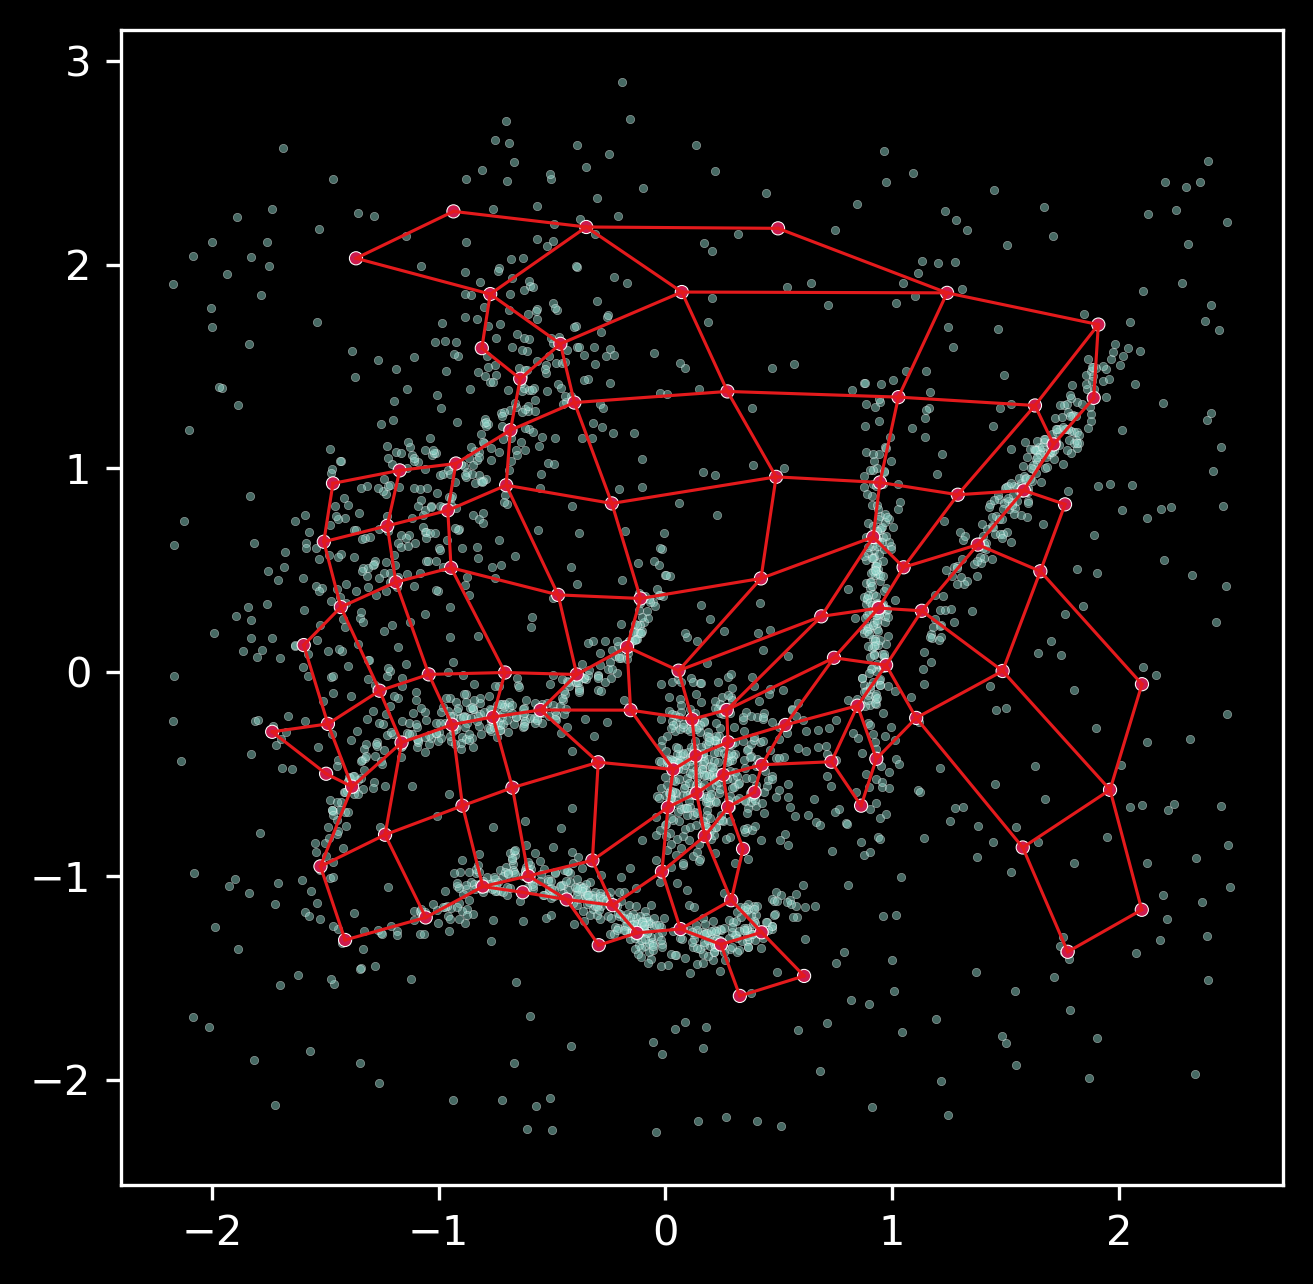

In [3]:
edges = list(som.som_.edges)
weights = som.weights_
f = plt.figure(figsize=(5, 5), dpi=300, edgecolor="red")
for edge in edges:
    sns.lineplot(
        x=[
            som.som_.nodes().data()[edge[0]]["weight"][0],
            som.som_.nodes().data()[edge[1]]["weight"][0],
        ],
        y=[
            som.som_.nodes().data()[edge[0]]["weight"][1],
            som.som_.nodes().data()[edge[1]]["weight"][1],
        ],
        size=1,
        legend=False,
        hue=[4] * 2,
        palette="Set1",
    )

sns.scatterplot(x=data[:, 0], y=data[:, 1], s=4, alpha=0.5)

sns.scatterplot(
    x=weights[:, 0],
    y=weights[:, 1],
    hue=[1] * len(som.neurons_),
    palette="rocket",
    s=10,
    legend=False,
)
print(som.topographic_error_)
plt.savefig("2d_example.png")